In [242]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [243]:
#importing the train dataset
train=pd.read_csv('TRAIN.csv')

In [244]:
#importing the test dataset
test=pd.read_csv('TEST_FINAL.csv')

In [245]:
#checking what are the columns included in train dataset
train.columns


Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

In [246]:
#checking what are the columns included in test dataset 
test.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount'],
      dtype='object')

In [247]:
#checking the shape of both test and train data sets
print(test.shape)
print(train.shape)

(22265, 8)
(188340, 10)


In [248]:
#checking whether the train dataset has missing/null values
train.isnull().sum().sort_values(ascending=False)

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [249]:
#checking whether the test dataset has missing/null values
test.isnull().sum().sort_values(ascending=False)

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

In [250]:
#checking the data types in the train dataset
train.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

In [251]:
#checking the data types in the test data
test.dtypes

ID               object
Store_id          int64
Store_Type       object
Location_Type    object
Region_Code      object
Date             object
Holiday           int64
Discount         object
dtype: object

In [252]:
train=train.drop('Date',axis=1)

In [253]:
#droping order column from the dataset
train=train.drop('#Order',axis=1)

In [254]:
#droping date column from the dataset
test=test.drop('Date',axis=1)

In [255]:
#Adding the sales column to the dataset so that we can concatenate test and train dataset
test['Sales']='test'

In [256]:
print(test.shape)
print(train.shape)

(22265, 8)
(188340, 8)


In [257]:
#combining the datasets 
combinedata=pd.concat([test,train],axis=0)

In [258]:
combinedata.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales
0,T1188341,171,S4,L2,R3,0,No,test
1,T1188342,172,S1,L1,R1,0,No,test
2,T1188343,173,S4,L2,R1,0,No,test
3,T1188344,174,S1,L1,R4,0,No,test
4,T1188345,170,S1,L1,R2,0,No,test


In [259]:
#droping ID column because it has unique values 
combinedata=combinedata.drop('ID',axis=1)

In [260]:
#droping Store_id as it has unique values 
combinedata=combinedata.drop('Store_id',axis=1)

In [261]:
#spliting the object columns and numerical columns
objectcolumns=combinedata.select_dtypes(include=['object'])
numericalcolumns=combinedata.select_dtypes(include=np.number)

In [262]:
#checking the columns included in the object columns
objectcolumns.columns

Index(['Store_Type', 'Location_Type', 'Region_Code', 'Discount', 'Sales'], dtype='object')

In [263]:
#checking the columns included in the numerical columns
numericalcolumns.columns

Index(['Holiday'], dtype='object')

In [264]:
# Added Sales Column to Numerical Data which was in Object Data
numericalcolumns['Sales']=objectcolumns.Sales

<ipython-input-264-0a5b1957434b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericalcolumns['Sales']=objectcolumns.Sales


In [265]:
# Drop Sales Column from Objectcolumns as it is added to Numericalcolumns
objectcolumns=objectcolumns.drop('Sales',axis=1)

In [266]:
#importing  holiday column to categorical from numerical 
categorycolumns=numericalcolumns[['Holiday']]

In [267]:
## Drop holiday Column from numericalcolumns as it is added to categorycolumns
numericalcolumns=numericalcolumns.drop(['Holiday'],axis=1)

In [268]:
print(objectcolumns.shape)
print(numericalcolumns.shape)
print(categorycolumns.shape)
# Number of Object Columns - 4
# Number of Numeric Columns - 1
# Number of Categorical Columns - 1

(210605, 4)
(210605, 1)
(210605, 1)


In [269]:
categorycolumns.columns

Index(['Holiday'], dtype='object')

<AxesSubplot:ylabel='Location_Type'>

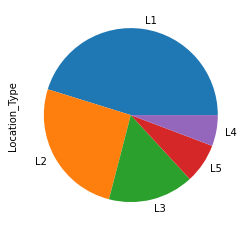

In [271]:
#plotting piechart for Location type
combinedata.Location_Type.value_counts().plot(kind='pie')

In [272]:
from sklearn.preprocessing import LabelEncoder

In [273]:
le=LabelEncoder()

In [274]:
# Label Encode or Dummy Varible Encoding of Object Cols
objectcolumnsdummy=objectcolumns.apply(le.fit_transform)

In [275]:
# Label Encode or Dummy Varible Encoding of Category Cols
categorycolumnsdummy=categorycolumns.apply(le.fit_transform)

In [276]:
# Concatinating all 3 dataframes - numericcols, objectcolsdummy & 
# categorycolsdummy into one Dataframe
combinedataclean=pd.concat([numericalcolumns,objectcolumnsdummy,
                         categorycolumnsdummy],axis=1)

In [277]:
combinedataclean.head()

,Sales,Store_Type,Location_Type,Region_Code,Discount,Holiday
0,test,3,1,2,0,0
1,test,0,0,0,0,0
2,test,3,1,0,0,0
3,test,0,0,3,0,0
4,test,0,0,1,0,0


In [278]:
traindf=combinedataclean[combinedataclean.Sales!='test']
testdf=combinedataclean[combinedataclean.Sales=='test']

In [279]:
testdf=testdf.drop('Sales',axis=1)

<AxesSubplot:>

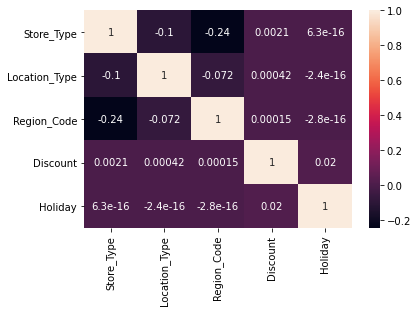

In [280]:
#heatmap of traindf data
sns.heatmap(traindf.corr(),annot=True)

<AxesSubplot:>

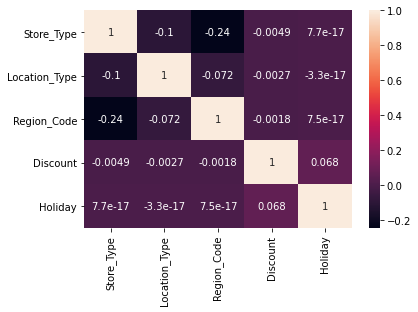

In [281]:
#heatmap of testdf data
sns.heatmap(testdf.corr(),annot=True)

<AxesSubplot:>

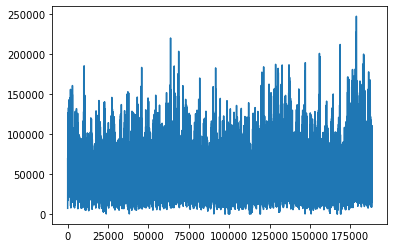

In [282]:
#line plot of Sales data
traindf.Sales.plot(kind='line')

<AxesSubplot:>

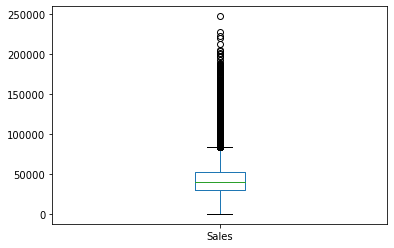

In [283]:
#boxplot of sales
traindf.Sales.plot(kind='box')

C:\Users\xyz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

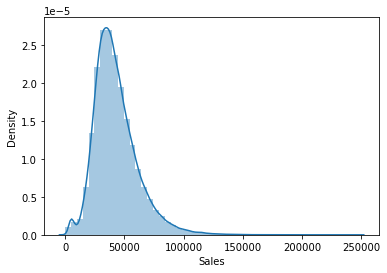

In [284]:
#distplot of sales
sns.distplot(traindf.Sales)

In [285]:
print(traindf.shape)
print(testdf.shape)

(188340, 6)
(22265, 5)


In [286]:
traindf.Sales=traindf.Sales.astype('float64')

C:\Users\xyz\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [287]:
# Split Data into DependentVariable(y) & Independent Variables (Xs)
y=traindf.Sales
X=traindf.drop(['Sales'],axis=1)

In [288]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [289]:
linreg=LinearRegression()

In [290]:
#model building for linear regression
linregmodel=linreg.fit(X,y)

In [291]:
linregmodel.score(X,y) #R-Square

0.42879687720564796

In [292]:
#prediction of test data
regpredict=linregmodel.predict(testdf)

In [293]:
#converting data to csv file
pd.DataFrame(regpredict).to_csv('reg.csv')

In [294]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [295]:
tree=DecisionTreeRegressor()

In [296]:
#model building for decision tree regressor
treemodel=tree.fit(X,y)

In [297]:
#R-Square
treemodel.score(X,y)

0.5696791425498942

In [298]:
#prediction of test data
treepredict=treemodel.predict(testdf)

In [299]:
#converting data to csv file
pd.DataFrame(treepredict).to_csv('tree.csv')

In [300]:
#RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor

In [301]:
RF=RandomForestRegressor(n_estimators=1000)

In [302]:
#model building for randomForestRegressor
RFmodel=RF.fit(X,y)

In [303]:
#R-Square
RFmodel.score(X,y)

0.5696786820088073

In [304]:
#predicting for the test data
Rfpredict=RFmodel.predict(testdf)

In [305]:
#converting data file to csv file
pd.DataFrame(Rfpredict).to_csv('RF.csv')#score=245.069111623465

In [306]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [307]:
gbm=GradientBoostingRegressor(n_estimators=1000)

In [308]:
#model building for GradientBoostingRegressor
gbmmodel=gbm.fit(X,y)

In [309]:
gbmmodel.score(X,y)

0.5683047213031687

In [310]:
#predicting model for test data
gbmpredict=gbmmodel.predict(testdf)

In [311]:
#converting data file to csv file
pd.DataFrame(gbmpredict).to_csv('GBM.csv')#score=245.67402292366117

In [313]:
#XGBoosting
from xgboost import XGBRegressor

In [314]:
xgb=XGBRegressor(n_estimators=1000,learning_rate=0.9,max_depth=6,min_child_weight=0.5)

In [315]:
#model building for XGBoosting
xgbmodel=xgb.fit(X,y)

In [316]:
#R-Square
xgbmodel.score(X,y)

0.5696791425496603

In [317]:
#predicting data for the test data
xgbpredict=xgbmodel.predict(testdf)

In [318]:
#converting data into 
pd.DataFrame(xgbpredict).to_csv('XGB.csv')# 245.06913116687045